In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

### Задача минимизировать целевую функцию
$ min (\sum_{j=1}^{3} q_j (\sum_{i=1}^{3} t_{ij} x_{ij}) ) $
### При ограничениях:
$\sum_{i=1}^{3} t_{ij} x_{ij} \leq \Phi_j , j = \vec {1,3}\\
\sum_{j=1}^{3} x_{ij} = A_i , i = \vec {1,3}\\
x_{ij} \geq 0 , i,j = \vec {1,3}$

$\Phi_j \text{ - равномерно распределенная случайная величина в интервале} [f_{j_{min}}, f_{j_{max}}] \\
t_{ij} \text{ - равномерно распределенная случайная величина в интервале} [t_{ij_{min}}, t_{ij_{max}}]$

In [2]:
f_min = np.array([20, 60, 20])
f_max = np.array([60, 90, 40])
t_min = np.array([0.2, 0.5, 0.1, 0.1, 0.2, 0.15, 0.05, 0.2, 0.3])
t_max = np.array([0.3, 1, 0.2, 0.2, 0.4, 0.3, 0.1, 0.4, 0.5])
A = np.array([100, 200, 100])
q = [30, 10, 20]

$F \text{ - Обратная функция лапласа} $

In [3]:
F_lap = 1.64
#Вероятность #Значение
# 0.9         1.64
# 0.8         1.28
# 0.7         1.04
# 0.6         0.84
# 0.5         0.68

$M_{\xi}, D_{\xi} \text{ для } \Phi_j, t_{ij}$

In [4]:
M_f = (f_max + f_min) / 2
D_f = ((f_max - f_min) ** 2) /12
M_t = (t_max + t_min) / 2
D_t = ((t_max - t_min) ** 2) /12

In [5]:
def f(x):
    return q[0] * (M_t[0:3] @ x[0:3]) + q[1] * (M_t[3:6] @ x[3:6]) + q[2] * (M_t[6:9] @ x[6:9])

#### Детерминированный эквивалент

In [6]:
def g1(x):
    return M_t[0:3] @ x[0:3] + F_lap * (D_t[0]*(x[0] ** 2) + D_t[1]*(x[1] ** 2) + D_t[2]*(x[2] ** 2) + D_f[0]) ** (0.5) - M_f[0]
def g2(x):
    return M_t[3:6] @ x[3:6] + F_lap * (D_t[3]*(x[3] ** 2) + D_t[4]*(x[4] ** 2) + D_t[5]*(x[5] ** 2) + D_f[1]) ** (0.5) - M_f[1]
def g3(x):
    return M_t[6:9] @ x[6:9] + F_lap * (D_t[6]*(x[6] ** 2) + D_t[7]*(x[7] ** 2) + D_t[8]*(x[8] ** 2) + D_f[2]) ** (0.5) - M_f[2]

#### Ограничения равенства

In [7]:
def h1(x):
    return x[0] + x[3] + x[6] - A[0]
def h2(x):
    return x[1] + x[4] + x[7] - A[1]
def h3(x):
    return x[2] + x[5] + x[8] - A[2]

### Метод Штрафных функций

In [8]:
eps = 0.00001
b = 2
p = 2
r = 1

def alfa(x):
    return  max(g1(x),0) ** p + max(g2(x),0) ** p + max(g3(x),0) ** p + (abs(h1(x)) ** p + abs(h2(x)) ** p + abs(h3(x)) ** p) + (((-x) * (-x > 0)) ** p).sum()

def Fx(x):
    return f(x) + r * alfa(x)

x0 = np.array([4, 0, 10, 0, 49, 0, 26, 1, 0])

rez = optimize.minimize(Fx, x0, method='nelder-mead', options = {'xtol': 1e-8, 'disp': True})
x = rez.x

while not (r * alfa(x) < eps):
    r = r * b
    rez = optimize.minimize(Fx, x, method='nelder-mead', options = {'xtol': 1e-8, 'disp': True})
    x = rez.x

Optimization terminated successfully.
         Current function value: 1243.809306
         Iterations: 1024
         Function evaluations: 1573
Optimization terminated successfully.
         Current function value: 1254.833893
         Iterations: 1026
         Function evaluations: 1564
Optimization terminated successfully.
         Current function value: 1256.672216
         Iterations: 1160
         Function evaluations: 1723
Optimization terminated successfully.
         Current function value: 1258.051127
         Iterations: 1097
         Function evaluations: 1676
Optimization terminated successfully.
         Current function value: 1258.395878
         Iterations: 1056
         Function evaluations: 1624
Optimization terminated successfully.
         Current function value: 1258.453337
         Iterations: 1132
         Function evaluations: 1677
Optimization terminated successfully.
         Current function value: 1258.482067
         Iterations: 1064
         Function eva

#### Выполнение ограничений

In [9]:
s = pd.Series([g1(x), g2(x), g3(x), h1(x), h2(x), h3(x)], ['g1(x)', 'g2(x)', 'g3(x)', 'h1(x)', 'h2(x)', 'h3(x)'])
print(s)

g1(x)   -9.871755e+00
g2(x)    2.758985e-07
g3(x)    4.862220e-08
h1(x)   -4.230932e-08
h2(x)   -1.716161e-07
h3(x)   -1.154402e-07
dtype: float64


### Результат

In [10]:
d = {"X_ij":'',"j=1":x[0:3],"j=2":x[3:6],"j=3":x[6:9]}
df = pd.DataFrame(d, index=['i=1','i=2','i=3'])
df

,X_ij,j=1,j=2,j=3
i=1,,-1.794737e-07,-3.127449e-08,1.000000e+02
i=2,,-4.969948e-07,1.599074e+02,4.009256e+01
i=3,,7.254805e+01,2.745195e+01,-1.386120e-07


In [11]:
print('f(x) = ',f(x))

f(x) =  1258.51078274


In [12]:
F_prob = np.empty([5])
F_prob[0] = 1137.27211688 #0.5
F_prob[1] = 1156.47630442 #0.6
F_prob[2] = 1181.29429404 # 0.7
F_prob[3] = 1211.49315635 # 0.8
F_prob[4] = 1258.51078274 # 0.9

### График зависимости целевой функции от вероятности выполнения плана

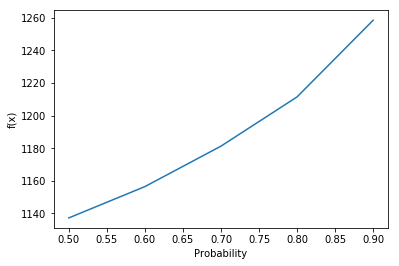

In [13]:
ox = [0.5, 0.6, 0.7, 0.8, 0.9]
plt.plot(ox, F_prob)
plt.xlabel('Probability')
plt.ylabel('f(x)')
plt.show()